In [19]:
from rbi.utils.fisher_info import fisher_info, monte_carlo_fisher
from torch.distributions import Normal
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [36]:
p1 = Normal(-0.5, 1)
p2 = Normal(0.5, 1)
p3 = Normal(-0.5, 0.2)
p4 = Normal(0.5, 0.2)

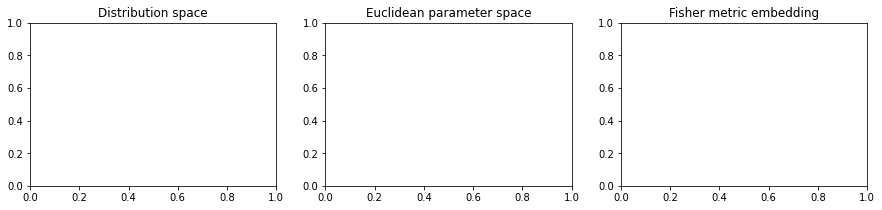

In [37]:
fig, axes = plt.subplots(1,3, figsize=(15, 3))
axes[0].set_title("Distribution space")
axes[1].set_title("Euclidean parameter space")
_ = axes[2].set_title("Fisher metric embedding")

In [38]:
x = torch.linspace(-4, 4, 1000)
axes[0].plot(x, p1.log_prob(x).exp())
axes[0].plot(x, p2.log_prob(x).exp())
axes[0].plot(x, p3.log_prob(x).exp())
axes[0].plot(x, p4.log_prob(x).exp())

In [39]:
param1 = torch.tensor([-0.5, 1.])
param2 = torch.tensor([0.5, 1.])
param3 = torch.tensor([-0.5, 0.2])
param4 = torch.tensor([0.5, 0.2])
params = torch.vstack([param1, param2, param3, param4])

axes[1].plot([param1[0], param2[0]], [param1[1], param2[1]], "--", color="black",alpha=0.5)
axes[1].plot([param3[0], param4[0]], [param3[1], param4[1]], "--", color="black",alpha=0.5)
axes[1].scatter(param1[0], param1[1], s=50)
axes[1].scatter(param2[0], param2[1], s=50)
axes[1].scatter(param3[0], param3[1], s=50)
axes[1].scatter(param4[0], param4[1], s=50)


In [40]:
def fisher_infor_metric(x,y):
    diff = x-y
    F = 0.5*(fisher_info(torch.distributions.Normal(x[0],x[1])) + fisher_info(torch.distributions.Normal(y[0],y[1])))
    return torch.sqrt((F@diff)@diff)

In [41]:
D = torch.zeros(4,4)
for i in range(4):
    for j in range(4):
        D[i,j] = fisher_infor_metric(params[i], params[j])



In [42]:
model = MDS(dissimilarity='precomputed', metric=True, max_iter=10000, n_init=1000, eps=1e-8)
param_embeded = model.fit_transform(D.numpy())
param_embeded = torch.tensor(param_embeded)

In [43]:
axes[2].plot([param_embeded[0,0], param_embeded[1,0]], [param_embeded[0,1], param_embeded[1,1]], "--", color="black",alpha=0.5)
axes[2].plot([param_embeded[2,0], param_embeded[3,0]], [param_embeded[2,1], param_embeded[3,1]], "--", color="black",alpha=0.5)
for i in range(4):
    axes[2].scatter(param_embeded[i, 0], param_embeded[i, 1], s=50)
    

In [44]:
fig.savefig("gaussian_fisher_information_matrix_parameter.png")

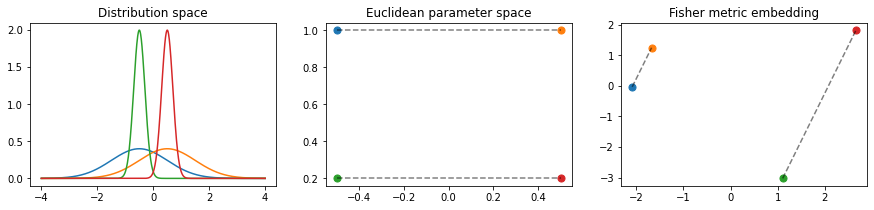

In [45]:
fig

In [46]:
parameters = torch.tensor([[0.3, 0.4, 0.1, 0.1], [0.05, 0.05, 0.49, 0.49], [0.0001, 1-0.0003, 0.0001,0.0001], [0.0001, 0.0001, 1-0.0003,0.0001]])
def generator(parameters):
    return torch.distributions.Categorical(parameters)

def fisher_infor_metric(x,y):
    diff = x-y
    F = 0.5*(fisher_info(generator(x)) + fisher_info(generator(y)))
    return torch.sqrt((F@diff)@diff)

([<matplotlib.axis.XTick at 0x26cb64f3430>,
 [Text(0.5, 0, '0'), Text(2.5, 0, '1'), Text(4.5, 0, '2'), Text(6.5, 0, '3')])

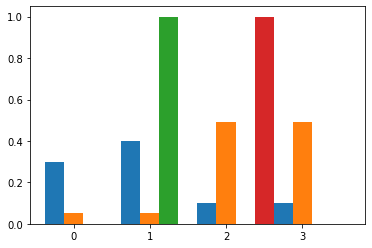

In [47]:
plt.bar(torch.arange(4)*2,parameters[0], width=0.5)
plt.bar(torch.arange(4)*2+0.5,parameters[1], width=0.5)
plt.bar(torch.arange(4)*2+1,parameters[2], width=0.5)
plt.bar(torch.arange(4)*2+1.5,parameters[3], width=0.5)
plt.xticks([0.5, 2.5, 4.5, 6.5], [0,1,2,3])


In [48]:
euclidean_dist = torch.cdist(parameters, parameters)
model = MDS(dissimilarity='precomputed', metric=True, max_iter=10000, n_init=1000, eps=1e-8)
param_embeded = model.fit_transform(euclidean_dist.numpy())
param_embeded = torch.tensor(param_embeded)

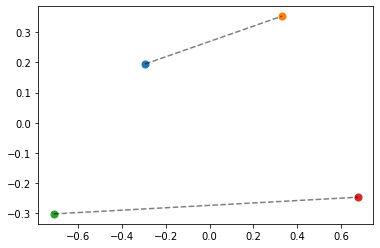

In [49]:
plt.plot([param_embeded[0,0], param_embeded[1,0]], [param_embeded[0,1], param_embeded[1,1]], "--", color="black",alpha=0.5)
plt.plot([param_embeded[2,0], param_embeded[3,0]], [param_embeded[2,1], param_embeded[3,1]], "--", color="black",alpha=0.5)
for i in range(4):
    plt.scatter(param_embeded[i, 0], param_embeded[i, 1], s=50)
    

In [50]:
D = torch.zeros(4,4)
for i in range(4):
    for j in range(4):
        D[i,j] = fisher_infor_metric(parameters[i], parameters[j])



In [51]:

model = MDS(dissimilarity='precomputed', metric=True, max_iter=10000, n_init=1000, eps=1e-8)
param_embeded = model.fit_transform(D.numpy())
param_embeded = torch.tensor(param_embeded)

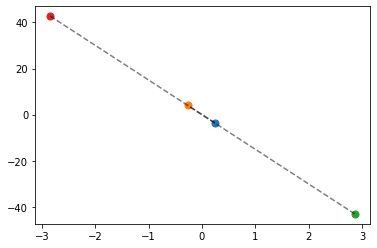

In [52]:
plt.plot([param_embeded[0,0], param_embeded[1,0]], [param_embeded[0,1], param_embeded[1,1]], "--", color="black",alpha=0.5)
plt.plot([param_embeded[2,0], param_embeded[3,0]], [param_embeded[2,1], param_embeded[3,1]], "--", color="black",alpha=0.5)
for i in range(4):
    plt.scatter(param_embeded[i, 0], param_embeded[i, 1], s=50)
    

In [196]:
from rbi.utils.distributions import MixtureOfDiagNormals
parameters = torch.tensor([[1., 1, 1, 1], [-1, -1, 1, 1], [-0.2, 0.2, 0.1, 0.9], [0.5, -0.5, 0.1,0.9]])

def generator(parameter):
    parameter = parameter[:, :2].unsqueeze(-1)
    return MixtureOfDiagNormals(parameter, torch.ones_like(parameter)*0.2, parameters[:, 2:])

In [207]:
generator(parameters)

MixtureOfDiagNormals(locs: torch.Size([4, 2, 1]), coord_scale: torch.Size([4, 2, 1]), component_logits: torch.Size([4, 2]))

In [197]:
def fisher_infor_metric(x,y):
    diff = x-y
    F1 = monte_carlo_fisher(x.unsqueeze(0), generator, mc_samples=100000, create_graph=False)
    F2 = monte_carlo_fisher(y.unsqueeze(0), generator, mc_samples=100000, create_graph=False )
    F = 0.5*(F1[0] + F2[0])
    return torch.sqrt(torch.abs((F@diff)@diff))

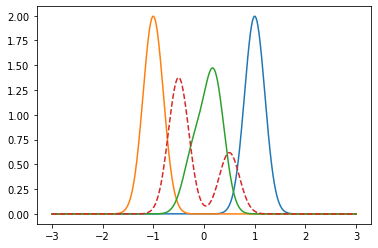

In [203]:
x = torch.linspace(-3,3, 1000)
ps = generator(parameters)
logps = ps.log_prob(x.repeat(1, 4, 1).T)
plt.plot(x, logps[:,0].exp())
plt.plot(x, logps[:,1].exp())
plt.plot(x, logps[:,2].exp())
plt.plot(x, logps[:,3].exp(), "--")

In [204]:
euclidean_dist = torch.cdist(parameters, parameters)
model = MDS(dissimilarity='precomputed', metric=True, max_iter=10000, n_init=1000, eps=1e-8)
param_embeded = model.fit_transform(euclidean_dist.numpy())
param_embeded = torch.tensor(param_embeded)

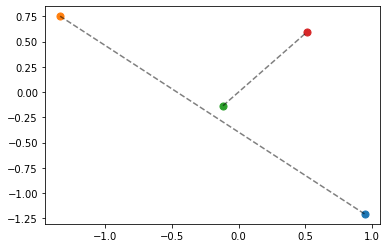

In [205]:
plt.plot([param_embeded[0,0], param_embeded[1,0]], [param_embeded[0,1], param_embeded[1,1]], "--", color="black",alpha=0.5)
plt.plot([param_embeded[2,0], param_embeded[3,0]], [param_embeded[2,1], param_embeded[3,1]], "--", color="black",alpha=0.5)
for i in range(4):
    plt.scatter(param_embeded[i, 0], param_embeded[i, 1], s=50)
    

In [206]:
D = torch.zeros(4,4)
for i in range(4):
    for j in range(4):
        D[i,j] = fisher_infor_metric(parameters[i], parameters[j]).detach()

RuntimeError: Size does not match at dimension 0 expected index [4, 100000, 1] to be smaller than self [1, 2, 1] apart from dimension 1

In [177]:
D

tensor([[ 0.0000,  9.9995,  5.1511,  5.1503],
        [10.0027,  0.0000,  5.1475,  5.1666],
        [ 5.1585,  5.1541,  0.0000,  4.9925],
        [ 5.1642,  5.1583,  4.9904,  0.0000]])

In [178]:
D = 0.5*(D.T + D)

In [179]:

model = MDS(dissimilarity='precomputed', metric=True, max_iter=10000, n_init=1000, eps=1e-8)
param_embeded = model.fit_transform(D.numpy())
param_embeded = torch.tensor(param_embeded)

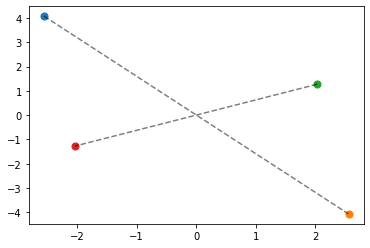

In [180]:
plt.plot([param_embeded[0,0], param_embeded[1,0]], [param_embeded[0,1], param_embeded[1,1]], "--", color="black",alpha=0.5)
plt.plot([param_embeded[2,0], param_embeded[3,0]], [param_embeded[2,1], param_embeded[3,1]], "--", color="black",alpha=0.5)
for i in range(4):
    plt.scatter(param_embeded[i, 0], param_embeded[i, 1], s=50)
    